<a href="https://colab.research.google.com/github/olimpiojunior/Dados-Goggle-Colaboratory/blob/master/Olimpio_Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print("Hello World")

Hello World


#Iniciando estudos com Pandas
Vamos aprender como extrair dados usando o Pandas

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Nessa células pegamos o data frame direto de um diretório na web

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


É possível obter um relatório de indormações sobre a variável utilizando o "?"

In [0]:
filmes?

In [0]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.shape

(100836, 4)

In [0]:
avaliacoes.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

Mudando os nomes das colunas

In [0]:
avaliacoes.columns = ["usuariosId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuariosId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Aqui é feito um requerimento de todos os filmes de Id igual a 1

In [0]:
filmeId_1 = avaliacoes.query("filmeId == 1")
filmeId_1.head()

,usuariosId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


Extraindo a descrição das colunas

In [0]:
avaliacoes.describe()

,usuariosId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Extraindo apenas a coluna Notas

In [0]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

Requerimento da média da coluna nota somente do filme de Id igual a 1

---



In [0]:
avaliacoes.query("filmeId==1")["nota"].mean()

3.9209302325581397

Extraindo a média da coluna nota com a coluna filmeId agrupada

In [0]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.round(decimals=2)

filmeId
1         3.92
2         3.43
3         3.26
4         2.36
5         3.07
          ... 
193581    4.00
193583    3.50
193585    3.50
193587    3.50
193609    4.00
Name: nota, Length: 9724, dtype: float64

Aqui é feito um join com a média das notas dos filmes e a tabela filmes

In [0]:
filme_com_media = filmes.join(notas_medias_por_filme, on = "filmeId")
filme_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
filme_com_media = filme_com_media.rename(columns={"nota": "nota_media"})
filme_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Ordenando por maior média de nota através da função Sort()

In [0]:
filme_com_media.sort_values("nota_media", ascending = False).head()

,filmeId,titulo,generos,nota_media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0


Número de avaliações por filme

In [0]:
qtd_avaliacoes_por_filme = avaliacoes.groupby("filmeId")["nota"].count()
qtd_avaliacoes_por_filme.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: nota, dtype: int64

Atribuindo as mudanças para o dataframe new filmes

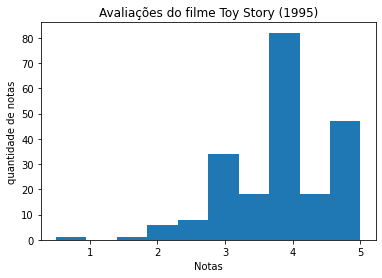

In [0]:
avaliacoes.query("filmeId==1")["nota"].plot(kind = 'hist', title = "Avaliações do filme Toy Story (1995)")
plt.xlabel("Notas")
plt.ylabel("quantidade de notas")
plt.show()

Arredondando as médias para duas casas decimais

#Desafio 1
Determine quantos filmes não tem avaliações e quais são esses filmes.

In [0]:
filme_com_avaliacoes = filmes.join(qtd_avaliacoes_por_filme, on = "filmeId")
filme_com_avaliacoes["nota"].isnull().value_counts()
filme_sem_avaliacoes = filme_com_avaliacoes["nota"].isnull()
filme_com_avaliacoes[filme_sem_avaliacoes]

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


#Desafio 2
Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [0]:
#filme_com_media = filme_com_media.rename(columns={"nota": "media"})
filme_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


#Desafio 3
Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme

In [0]:
filme_com_avaliacoes = filme_com_avaliacoes.rename(columns={'nota':'Total'})
filme_com_avaliacoes.head()

,filmeId,titulo,generos,Total
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
4,5,Father of the Bride Part II (1995),Comedy,49.0


#Desafio 4
Arredondar as médias (coluna de nota média) para duas casas decimais.

In [0]:
filme_com_media.round(decimals=2)

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


#Desafio 5
Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [0]:
generos = filmes["generos"].str.get_dummies('|')
list(generos)

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

#Desafio 6
Contar o número de aparições de cada genero.

In [0]:
filmes["generos"].str.get_dummies().sum().sort_values(ascending = False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

#Desafio 7
Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

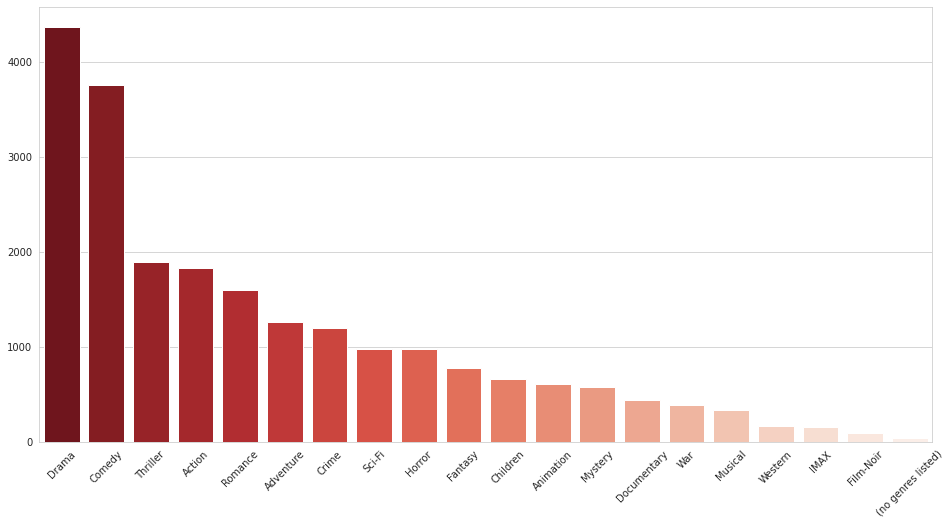

In [0]:
filme_por_genero = filmes["generos"].str.get_dummies().sum().sort_values(ascending = False)
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
plt.xticks(rotation = 45)
sns.barplot(x = filme_por_genero.index, y = filme_por_genero.values, palette='Reds_r')
plt.show()